In [2]:
import pandas as pd

train_df = pd.read_csv("/content/train.csv")
test_df = pd.read_csv("/content/test.csv")


print("Train set shape:", train_df.shape)
print("Test set shape:", test_df.shape)



Train set shape: (44765, 25)
Test set shape: (25976, 25)


In [3]:
train_df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460.0,3.0,4.0,...,5.0,4.0,3.0,4.0,4.0,5.0,5.0,25.0,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235.0,3.0,2.0,...,1.0,1.0,5.0,3.0,1.0,4.0,1.0,1.0,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142.0,2.0,2.0,...,5.0,4.0,3.0,4.0,4.0,4.0,5.0,0.0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562.0,2.0,5.0,...,2.0,2.0,5.0,3.0,1.0,4.0,2.0,11.0,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214.0,3.0,3.0,...,3.0,3.0,4.0,4.0,3.0,3.0,3.0,0.0,0.0,satisfied


In [4]:
train_df.tail()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
44760,44760,42101,Female,Loyal Customer,26,Business travel,Business,2745.0,3.0,1.0,...,3.0,1.0,3.0,2.0,3.0,1.0,3.0,2.0,13.0,neutral or dissatisfied
44761,44761,118874,Male,Loyal Customer,29,Business travel,Eco,1136.0,2.0,2.0,...,2.0,3.0,3.0,4.0,1.0,3.0,2.0,20.0,22.0,neutral or dissatisfied
44762,44762,57990,Female,Loyal Customer,29,Business travel,Business,2191.0,1.0,1.0,...,5.0,3.0,3.0,5.0,5.0,4.0,5.0,0.0,0.0,satisfied
44763,44763,46836,Female,Loyal Customer,28,Business travel,Business,2465.0,1.0,1.0,...,4.0,4.0,4.0,5.0,2.0,1.0,4.0,0.0,0.0,satisfied
44764,44764,51364,Male,Loyal Customer,32,Personal,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Step 1.1: Check basic dataset info
print("Train Dataset Info:")
train_df.info()

print("\nMissing Values (Train):")
print(train_df.isnull().sum())

print("\nTest Dataset Info:")
test_df.info()

print("\nMissing Values (Test):")
print(test_df.isnull().sum())


Train Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44765 entries, 0 to 44764
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         44765 non-null  int64  
 1   id                                 44765 non-null  int64  
 2   Gender                             44765 non-null  object 
 3   Customer Type                      44765 non-null  object 
 4   Age                                44765 non-null  int64  
 5   Type of Travel                     44765 non-null  object 
 6   Class                              44764 non-null  object 
 7   Flight Distance                    44764 non-null  float64
 8   Inflight wifi service              44764 non-null  float64
 9   Departure/Arrival time convenient  44764 non-null  float64
 10  Ease of Online booking             44764 non-null  float64
 11  Gate location                     

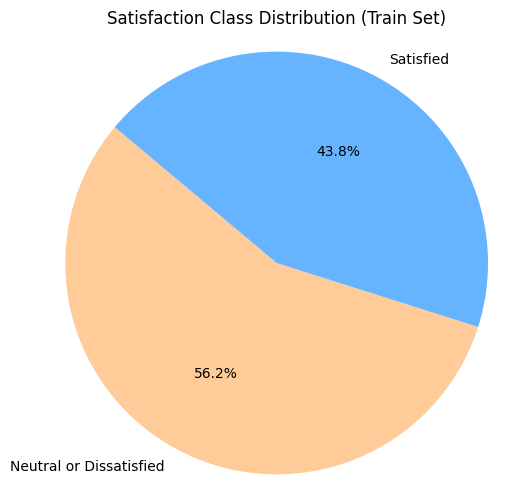

In [6]:
import matplotlib.pyplot as plt

# Pie chart for class distribution
target_counts = train_df['satisfaction'].value_counts()
labels = ['Neutral or Dissatisfied', 'Satisfied']
sizes = target_counts.values

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#ffcc99', '#66b3ff'])
plt.title('Satisfaction Class Distribution (Train Set)')
plt.axis('equal')
plt.show()


In [7]:
# Step 1.4: Drop missing value rows in both train and test sets
train_df.dropna(inplace=True)
test_df.dropna(inplace=True)

print("✅ Missing values removed.")
print("New train shape:", train_df.shape)
print("New test shape:", test_df.shape)


✅ Missing values removed.
New train shape: (44628, 25)
New test shape: (25893, 25)


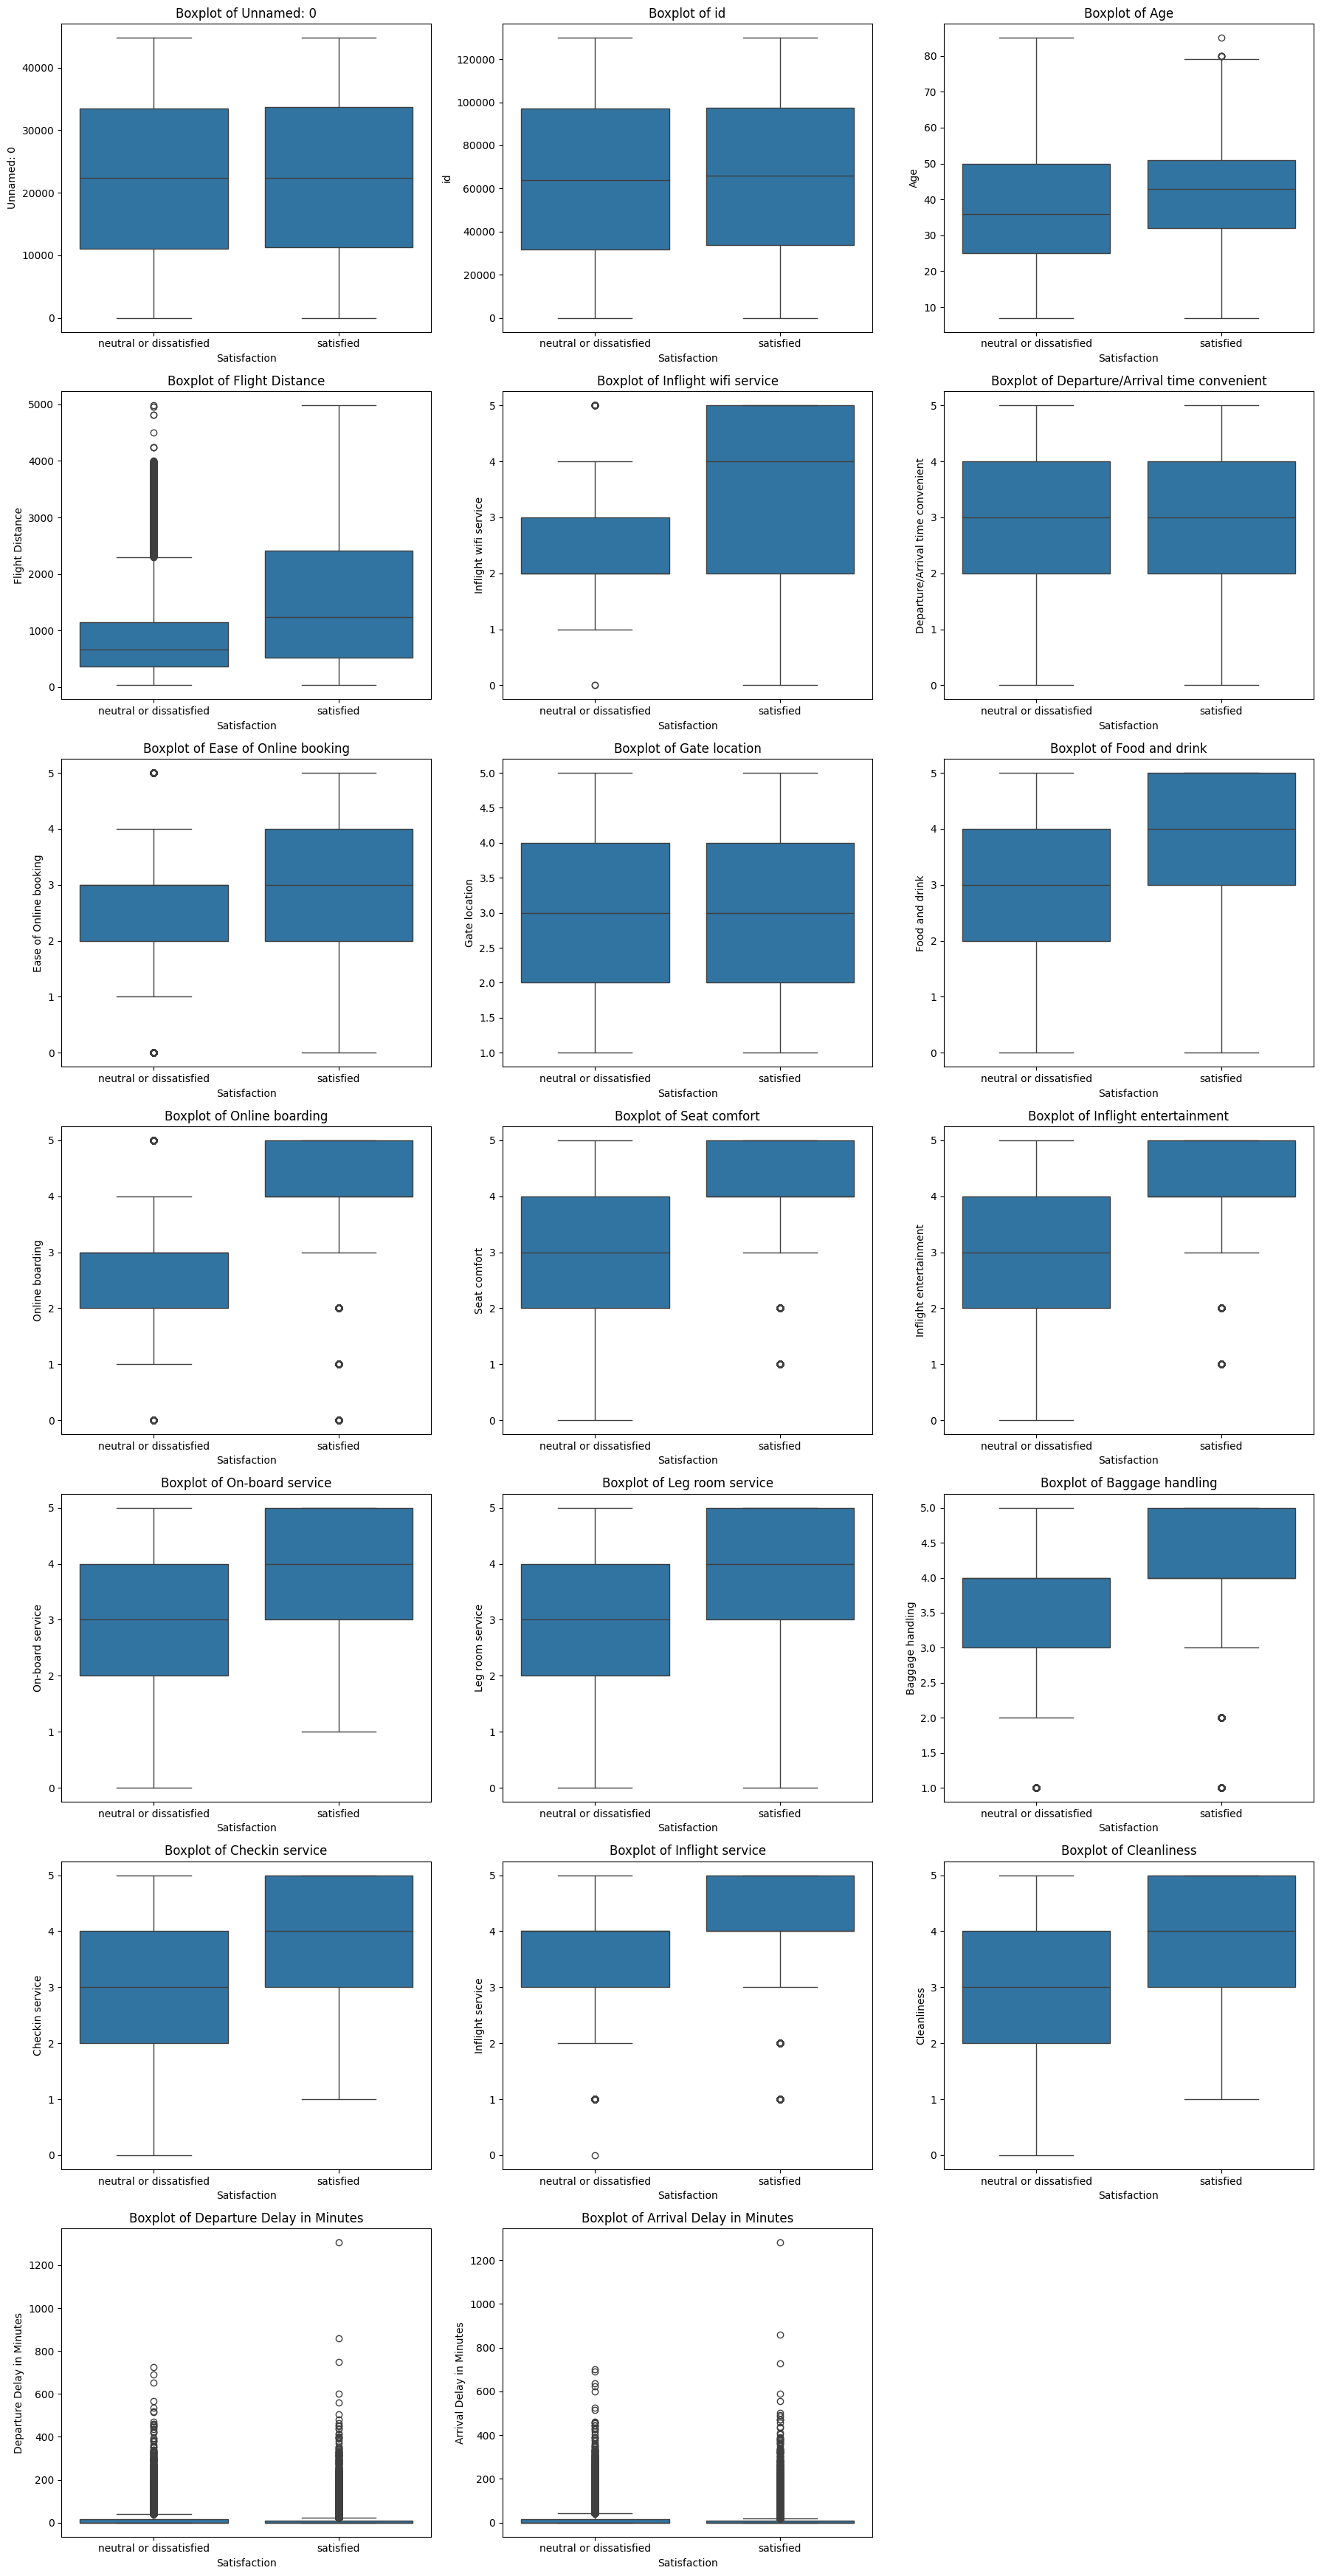

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric columns
numeric_cols = train_df.select_dtypes(include=['float64', 'int64']).columns

# Plot in a 3-column grid
num_plots = len(numeric_cols)
rows = (num_plots // 3) + int(num_plots % 3 != 0)

fig, axes = plt.subplots(rows, 3, figsize=(18, 5 * rows))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.boxplot(data=train_df, x='satisfaction', y=col, ax=axes[i])
    axes[i].set_title(f"Boxplot of {col}")
    axes[i].set_xlabel("Satisfaction")
    axes[i].set_ylabel(col)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [11]:
# Drop ID columns
columns_to_drop = ['Unnamed: 0', 'id']
train_df.drop(columns=columns_to_drop, axis=1, inplace=True)
test_df.drop(columns=columns_to_drop, axis=1, inplace=True)


In [13]:
# Encode target column
train_df['satisfaction'] = train_df['satisfaction'].replace({
    'satisfied': 1,
    'neutral or dissatisfied': 0
})

test_df['satisfaction'] = test_df['satisfaction'].replace({
    'satisfied': 1,
    'neutral or dissatisfied': 0
})

<ipython-input-13-371d9f84cf88>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_df['satisfaction'] = train_df['satisfaction'].replace({
<ipython-input-13-371d9f84cf88>:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_df['satisfaction'] = test_df['satisfaction'].replace({


In [14]:
from sklearn.preprocessing import LabelEncoder
import joblib
import os

# Create folder for encoders
os.makedirs("logreg_encoders", exist_ok=True)

# Encode each categorical column
categorical_cols = train_df.select_dtypes(include='object').columns
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    train_df[col] = le.fit_transform(train_df[col])
    test_df[col] = le.transform(test_df[col])
    joblib.dump(le, f"logreg_encoders/{col}_encoder.pkl")
    label_encoders[col] = le


In [15]:
from sklearn.preprocessing import StandardScaler

# Separate features and labels
X_train_full = train_df.drop('satisfaction', axis=1)
y_train_full = train_df['satisfaction']

X_test_full = test_df.drop('satisfaction', axis=1)
y_test_full = test_df['satisfaction']

# Apply StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_full)
X_test_scaled = scaler.transform(X_test_full)


In [16]:
from sklearn.model_selection import train_test_split

# Stratified split of training data
X_train, X_val, y_train, y_val = train_test_split(
    X_train_scaled,
    y_train_full,
    test_size=0.2,
    random_state=42,
    stratify=y_train_full
)

print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)


Training set shape: (35702, 22)
Validation set shape: (8926, 22)


In [17]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(
    solver='liblinear',
    C=1.0,
    max_iter=1000,
    random_state=42
)

# Train the model
log_model.fit(X_train, y_train)

print("✅ Logistic Regression model trained.")


✅ Logistic Regression model trained.


In [18]:
from sklearn.metrics import accuracy_score

# Predict on training set
y_train_pred = log_model.predict(X_train)

# Training accuracy
train_acc = accuracy_score(y_train, y_train_pred)
print(f"🔍 Training Accuracy: {train_acc * 100:.2f}%")


🔍 Training Accuracy: 87.30%


In [19]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear'],  # liblinear supports both L1 and L2
}

# Initialize base model
log_base = LogisticRegression(max_iter=1000, random_state=42)

# Grid search with cross-validation
grid_search = GridSearchCV(log_base, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model and parameters
best_log_model = grid_search.best_estimator_
print("✅ Best Parameters Found:", grid_search.best_params_)


✅ Best Parameters Found: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}


In [20]:
# Use the best hyperparameters
best_log_model = LogisticRegression(
    C=1,
    penalty='l2',
    solver='liblinear',
    max_iter=1000,
    random_state=42
)

# Train the model
best_log_model.fit(X_train, y_train)

print("✅ Best Logistic Regression model trained.")


✅ Best Logistic Regression model trained.


In [21]:
from sklearn.metrics import accuracy_score

# Predict on training data
y_train_pred = best_log_model.predict(X_train)

# Accuracy
train_acc = accuracy_score(y_train, y_train_pred)
print(f"🔍 Training Accuracy (Tuned Model): {train_acc * 100:.2f}%")


🔍 Training Accuracy (Tuned Model): 87.30%


In [23]:
#  Predict labels and probabilities for validation set
y_val_pred = best_log_model.predict(X_val)
y_val_proba = best_log_model.predict_proba(X_val)[:, 1]

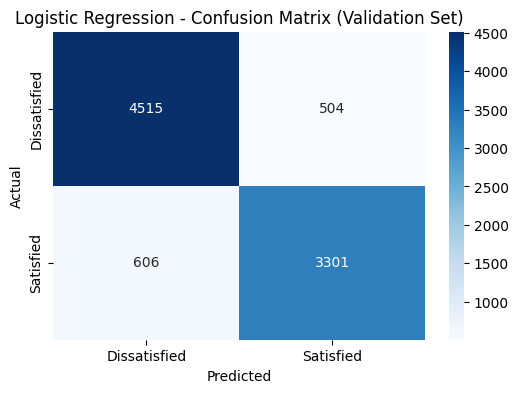

In [24]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion matrix
cm_val = confusion_matrix(y_val, y_val_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_val, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Dissatisfied', 'Satisfied'],
            yticklabels=['Dissatisfied', 'Satisfied'])
plt.title("Logistic Regression - Confusion Matrix (Validation Set)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [25]:
from sklearn.metrics import classification_report

print("Logistic Regression - Classification Report (Validation Set):\n")
print(classification_report(y_val, y_val_pred, target_names=['Dissatisfied', 'Satisfied']))


Logistic Regression - Classification Report (Validation Set):

              precision    recall  f1-score   support

Dissatisfied       0.88      0.90      0.89      5019
   Satisfied       0.87      0.84      0.86      3907

    accuracy                           0.88      8926
   macro avg       0.87      0.87      0.87      8926
weighted avg       0.88      0.88      0.88      8926



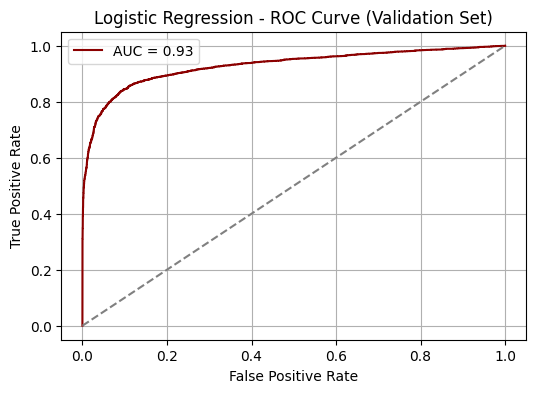

In [26]:
from sklearn.metrics import roc_curve, auc

# ROC curve
fpr, tpr, _ = roc_curve(y_val, y_val_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}", color='darkred')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("Logistic Regression - ROC Curve (Validation Set)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.show()
